# Appendix B - Cryptography with Python

In this appendix we include python code for all the ciphers we have considered in these notes.
We recommend you use python in the online jupyter notebook provided by the Pacific Institute of the Mathematical Science and Compute Canada, which is free for all students to use, and can be found at  

> [https://pims.syzygy.ca/]

Login using your existing google account (it is required to have a google account to use this service).

Once you login you can create a new Python 3 notebook and begin coding right away.  Also, you can import jupyter notebooks that others create and share (these have a \verb|.ipynb| extension). During this camp we'll share with you the jupyter notebook containing all the code in this appendix, and we'll demonstrate how to get started with it.

Quite a bit of this code was inspired by the excellent book *Cracking Codes with Python*, by Al Sweigart.
> [https://inventwithpython.com/cracking/]

## Shift Cipher

Below we provide an implementation of the Shift Cipher as `functions`. These are packets of code designed to do specific tasks; they are given names so we can call upon them later in our code. 

A few comments are in order about reading the code:

1. First, it is perfectly ok if you don't understand what is going on. We'll talk about this during the camp. Getting a feel for what the code does by using it in examples is a good place to start. Once you get a feel for *what* it does, then you are ready to explore *how* it does it.

2. Second, whitespace is important in Python — not just for readability, but it is actually how Python determines how to group lines of code for execution.

3. Third, text in green and blue are keywords Python recognizes (i.e. they mean something to Python). Lines beginning with `#` or surrounded by triple quotes `"""` are comments. These are notes to the reader to improve the ability for a human to read the code — Python ignores these lines when executing the program.

We define two functions: `shiftEncrypt` and `shiftDecrypt`. Both functions call `shiftCipher`, which takes as input:

1. `key` - the encryption key for how much each symbol should be shifted to the right along the `symbolList`.

2. `message` - a message to be encrypted/decrypted.

3. `mode` - which is either `'encrypt'` or `'decrypt'`.

4. `symbolList` - an (ordered) string of symbols (default = `'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`).

Click on the cell below, then press 'shift-enter', or the play button in the menu above, to run the cell. This will load the funtions into Pythons memory.

In [1]:
def shiftEncrypt(key, message, symbolList='ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    """Return the ciphertext of message encrypted using the Shift 
    cipher with key. Default symbolList is A-Z"""
    return(shiftCipher(key, message, 'encrypt', symbolList))

def shiftDecrypt(key, message, symbolList='ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    """Return the plaintext of message encrypted using the Shift 
    cipher with key. Default symbolList is A-Z"""
    return(shiftCipher(key, message, 'decrypt', symbolList))  
        
def shiftCipher(key, message, mode, symbolList):
    # mode = 'encrypt' OR mode = 'decrypt'
    
    # Every possible symbol that can be encrypted:
    SYMBOLS = symbolList

    # Store the encrypted/decrypted form of the message:
    translated = ''
    
    for symbol in message:
    # Note: Only symbols in the SYMBOLS string can be 
    # encrypted/decrypted.
        if symbol in SYMBOLS:
            symbolIndex = SYMBOLS.find(symbol)
        
            # Perform encryption/decryption:
            if mode == 'encrypt':
                translatedIndex = (symbolIndex + key) % len(SYMBOLS)
            elif mode == 'decrypt':
                translatedIndex = (symbolIndex - key) % len(SYMBOLS)
            
            # Append the encrypted/decrypted symbol to the end of 
            # the translated string
            translated = translated + SYMBOLS[translatedIndex]
        else:
            # Append the symbol without encrypting/decrypting
            translated = translated + symbol

    # Output the translated string
    return translated

An example of how to use this function is shown below. Again, use 'shift-enter' to run the cell, or press that play button in the menu at the top.

In [2]:
# Example 1 of Shift cipher:
SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' # default alphabet
message = 'THIS IS MY SECRET MESSAGE.'
key = 11    # shift characters 11 places right in SYMBOLS list.

# encrypt plain text message
translated = shiftEncrypt(key, message, SYMBOLS)
print(translated)

# decrypt cipher text
print(shiftDecrypt(key, translated, SYMBOLS))

ESTD TD XJ DPNCPE XPDDLRP.
THIS IS MY SECRET MESSAGE.


Now that we have the computer do all the work of encrypting/decrypting we can increase the size of the symbols list to include both upper and lower case letter, digits, spaces, and punctuation. As the next example shows, this makes the cipher text look even more cryptic!

In [4]:
# Example 2 of Shift cipher:
SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz1234567890 !?.'

message = 'This is my secret message'
key = 11   # shift characters 11 places right in SYMBOLS list.

# encrypt plain text message
translated = shiftEncrypt(key, message, SYMBOLS)
print(translated)

# decrypt cipher text
print(shiftDecrypt(key, translated, SYMBOLS))

est4Ht4Hx0H4pn3p5Hxp44lrp
This is my secret message


## Substitution Cipher

First start with a string of symbols that are to be encoded. Anything not included here will remain unchanged in the ciphertext.  
By default the list of symbols is:

`SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`

We define two functions: `substitutionEncrypt` and `substitutionDecrypt`. Both functions call `substitutionCipher`, which takes as input:

1. `key` – the encryption key for how the original set of `SYMBOLS` will be permuted (this can be generated by `getRandomKey(SYMBOLS)`)

2. `message` – a message to be encrypted/decrypted

3. `mode` – which is either `'encrypt'` or `'decrypt'`

4. `symbolList` – an (ordered) string of symbols (default = `'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`)
Let me know if you'd like to format this as a complete Markdown document or include sample code blocks.

In [7]:
import random

def keyIsValid(key, symbolList='ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    keyList = list(key)
    lettersList = list(symbolList)
    keyList.sort()
    lettersList.sort()
    
    return keyList == lettersList

def getRandomKey(symbolList='ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    key = list(symbolList)
    random.shuffle(key)
    return ''.join(key)

def substitutionEncrypt(key, message, symbolList='ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    return substitutionCipher(key, message, 'encrypt', symbolList)

def substitutionDecrypt(key, message, symbolList='ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    return substitutionCipher(key, message, 'decrypt', symbolList)

def substitutionCipher(key, message, mode, symbolList='ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    translated = ''
    charsA = symbolList
    charsB = key
    if mode == 'decrypt':
        # For decrypting, we can use the same code as encrypting. 
        # We just need to swap where the key and symbols strings.
        charsA, charsB = charsB, charsA
    
    # Loop through each symbol in the message:
    for symbol in message:
        symIndex = charsA.find(symbol)
        if symIndex != -1:
            translated += charsB[symIndex]
        else:
            # Symbol is not in symbolList; just add it:
            translated += symbol
    
    return translated    

In [10]:
# Example 1 of Substitution cipher:
SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

key = getRandomKey(SYMBOLS)
mode = 'encrypt' # Set to 'encrypt' or 'decrypt'.
message = 'THIS IS A SECRET MESSAGE.'
ciphertext = substitutionEncrypt(key,message,SYMBOLS)
print('Using key: {0}'.format(key))
print('The encrypted message is: {0}'.format(ciphertext))

Using key: TAKMQUWFBDGCPSJZHLEIVYNRXO
The encrypted message is: IFBE BE T EQKLQI PQEETWQ.


## Transposition Cipher

We define two functions: `transpositionEncrypt` and `transpositionDecrypt`. Both functions take as input:

1. `key` – the encryption key that determines how many columns the table will have  
2. `message` – a message to be encrypted/decrypted

In [11]:
import math

def transpositionEncrypt(key, message):
    # Each string in ciphertext represents a column in the grid:
    ciphertext = [''] * key

    # Loop through each column in ciphertext:
    for column in range(key):
        currentIndex = column
        
        # Keep looping until currentIndex goes past the message length:
        while currentIndex < len(message):
            # Place the character at currentIndex in message at the
            # end of the current column in the ciphertext list:
            ciphertext[column] += message[currentIndex]

            # Move currentIndex over:
            currentIndex += key
            
    # Convert the ciphertext list into a single string value and return it:
    return ''.join(ciphertext)


def transpositionDecrypt(key, message):
    # The transposition decrypt function will simulate the "columns" and
    # "rows" of the grid that the plaintext is written on by using a list
    # of strings. First, we need to calculate a few values.

    # The number of "columns" in our transposition grid:
    numOfColumns = int(math.ceil(len(message) / float(key)))
    
    # The number of "rows" in our grid:
    numOfRows = key
    # The number of "shaded boxes" in the last "column" of the grid:
    numOfShadedBoxes = (numOfColumns * numOfRows) - len(message)
    
    # Each string in plaintext represents a column in the grid:
    plaintext = [''] * numOfColumns

    # The column and row variables point to where in the grid the next
    # character in the encrypted message will go:
    column = 0
    row = 0
    
    for symbol in message:
        plaintext[column] += symbol
        column += 1 # Point to the next column.

        # If there are no more columns OR we're at a shaded box,
        # go back to the first column and the next row:
        if (column == numOfColumns) or (column == numOfColumns - 1 
                           and row >= numOfRows - numOfShadedBoxes):
            column = 0
            row += 1

    return ''.join(plaintext)

In [12]:
# Example 1 of Transposition cipher:
message = '''there was a tree with apples on it. I neither took 
             apples nor left apples. How many apples were on 
             the tree?'''
key = 14
transpositionEncrypt(key, message)

'te h sla  heoe  ep\nte nr nsp hrw   o.l eeiit r e   tto  Hs twh.o lo  ra  k eww esaI  f e e p \natmr ?apn p ae  le pan  tei lpyo rst ep n '

## Number Theory

Below are the implementations of the algorithms to compute: `gcd`, `xgcd`, $a^{-1} \bmod m$, and Euler's $\phi$-function.


In [15]:
def gcd(a,b):
    """Return the GCD of a and b using Euclid's Algorithm."""
    while b > 0:
        a, b = b, a%b
    return a
    
def xgcd(a,b):
    """Extended GCD:
    Returns (gcd, x, y) where gcd is the greatest common divisor 
    of a and b with the sign of b if b is nonzero, and with the 
    sign of a if b is 0. The numbers x,y are such that 
    gcd = ax+by."""
    prevx, x = 1, 0;  prevy, y = 0, 1
    while b:
        q, r = divmod(a,b)
        x, prevx = prevx - q*x, x  
        y, prevy = prevy - q*y, y
        a, b = b, r
    return a, prevx, prevy    

def findModInverse(a,m):
    """Return the modular inverse of a%m, which is the number 
    x such that a*x = 1 mod m."""
    if gcd(a,m) != 1:
        return None # No mod inverse if a & m not relatively prime.
    
    # Calculate using the extended Euclidean algorithm
    return xgcd(a,m)[1]%m


def eulerPhi(a):
    """Return the number of positive integers less than
    a that are relatively prime to a"""
    if a == 1:
        return 1
    else:
        m = [n for n in range(1,a) if gcd(a,n)==1]
        return len(m) 

Here are some examples of how to use these functions.

In [16]:
gcd(124950,68040)

210

In [17]:
findModInverse(3,26)

9

In [18]:
# check
3*9 % 26	

1

In [19]:
eulerPhi(10)

4

## Affine Cipher

Start with a string of symbols that are to be encoded. Anything not included here will remain unchanged in the ciphertext.  
By default the list of symbols is:

`SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`

We define two functions: `affineEncrypt` and `affineDecrypt`. Both functions call `affineCipher`, which takes as input:

1. `keyA`, `keyB` – the encryption key:  
   $0 \le \text{keyA}, \text{keyB} \le \text{len(SYMBOLS)}$ and `keyA` must be relatively prime to `len(SYMBOLS)}`
2. `message` – a message to be encrypted/decrypted  
3. `mode` – which is either `'encrypt'` or `'decrypt'`  
4. `symbolList` – an (ordered) string of symbols (default = `'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`)

In [20]:
# WARNING - First make sure the findModInverse function is executed 
# (i.e. loaded into python) since the Affine cipher uses this
# functions. To do this go up to the cell where this function 
# is defined and run the cell.

def affineEncrypt(keyA, keyB, message, 
                         symbolList = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    """Return the ciphertext of message encrypted using the Affine 
    cipher with keyA, keyB. Default symbolList is A-Z"""
    return affineCipher(keyA, keyB, message, 'encrypt', symbolList)

def affineDecrypt(keyA, keyB, message, 
                         symbolList = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    """Return the plaintext of message encrypted using the Affine 
    cipher with keyA, keyB. Default symbolList is A-Z"""
    return affineCipher(keyA, keyB, message, 'decrypt', symbolList)
        
    
def affineCipher(keyA, keyB, message, mode, symbolList):
    # Every possible symbol that can be encrypted:
    SYMBOLS = symbolList
    modInverseOfKeyA = findModInverse(keyA,len(SYMBOLS))
    
    translated = ''
    for symbol in message:
        if symbol in SYMBOLS:
            symbolIndex = SYMBOLS.find(symbol)
            if mode == 'encrypt': # Encrypt the symbol
                translated += SYMBOLS[(symbolIndex*keyA+keyB) 
                                                   % len(SYMBOLS)]
            elif mode == 'decrypt':  # Decrypt the symbol
                translated += SYMBOLS[(symbolIndex-keyB)*
                                    modInverseOfKeyA % len(SYMBOLS)]
        else:
            translated += symbol # Append symbol without encrypting
            
    return translated    

In [21]:
# Example 1 of Affine cipher:

SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

myMessage = """THIS IS MY SECRET MESSAGE"""

myKeyA = 15   # must be relatively prime to length of SYMBOLS
myKeyB = 21
    
translated = affineEncrypt(myKeyA, myKeyB, myMessage, SYMBOLS)   

print('Key: {0}, {1}'.format(myKeyA,myKeyB))
print('message text:')
print(myMessage) 
print('Encrypted text:')
print(translated)	

Key: 15, 21
message text:
THIS IS MY SECRET MESSAGE
Encrypted text:
UWLF LF TR FDZQDU TDFFVHD


## Vigenère Cipher

Start with a string of symbols that are to be encoded. Anything not included here will remain unchanged in the ciphertext.  
By default the list of symbols is:

`SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`

We define two functions: `vigenereEncrypt` and `vigenereDecrypt`. Both functions call `vigenereCipher`, which takes as input:

1. `key` – the encryption key: a string of characters from `symbolList`  
2. `message` – a message to be encrypted/decrypted  
3. `mode` – which is either `'encrypt'` or `'decrypt'`  
4. `symbolList` – an (ordered) string of symbols (default = `'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`)


In [22]:
def vigenereEncrypt(key, message, symbolList = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    """Return the ciphertext of message encrypted using the Vigenere 
    cipher with key. Default symbolList is A-Z"""
    return vigenereCipher(key, message, 'encrypt', symbolList)


def vigenereDecrypt(key, message, symbolList = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    """Return the plaintext of message encrypted using the Vigenere 
    cipher with key. Default symbolList is A-Z"""
    return vigenereCipher(key, message, 'decrypt', symbolList)


def vigenereCipher(key, message, mode, symbolList):
    translated = [] # Stores the encrypted/decrypted message string.
    
    # Every possible symbol that can be encrypted:
    LETTERS = symbolList
    
    keyIndex = 0
    key = key.upper()

    for symbol in message: # Loop through each symbol in message.
        num = LETTERS.find(symbol)
        if num != -1: # -1 means symbol not found in LETTERS.
            if mode == 'encrypt':
                num += LETTERS.find(key[keyIndex]) # Add if encrypting.
            elif mode == 'decrypt':
                num -= LETTERS.find(key[keyIndex]) # Subtract if decrypting.

            num %= len(LETTERS) # Handle any wraparound.

            # Add the encrypted/decrypted symbol to the end of translated:
            translated.append(LETTERS[num])

            keyIndex += 1 # Move to the next letter in the key.
            if keyIndex == len(key):
                keyIndex = 0
        else:
            # Append the symbol without encrypting/decrypting.
            translated.append(symbol)

    return ''.join(translated)

In [23]:
# Example:
myMessage = """THIS IS MY SECRET MESSAGE I WILL ADD A FEW MORE 
WORDS TO MAKE IT A BIT LONGER"""
myKey = 'CAMP'

translated = vigenereEncrypt(myKey, myMessage)

print('Key: %s' % (myKey))
print('message text:')
print(myMessage) 
print('Encrypted text:')
print(translated)

Key: CAMP
message text:
THIS IS MY SECRET MESSAGE I WILL ADD A FEW MORE 
WORDS TO MAKE IT A BIT LONGER
Encrypted text:
VHUH KS YN UEOGGT YTUSMVG I IXNL MSF A RTY MAGG 
WAGFS FD OAWT KT M QKT XDPGQG


## Some Tools for Cryptanalysis

### Frequency Analysis Tools

Determining how many times each letter appears in a given chunk of text is an important hacking tool.  
Here we define a function `getLetterCount` which does nothing more than count the occurrence of each letter in a given string.

We also implement another function, `plotLetterCounts`, which draws a bar graph of this frequency count.


In [24]:
def getLetterCounts(message):
    # Returns a dictionary with keys of single letters and values of
    # the count of how many times they appear in the message 
    # parameter:
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    letterCount = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'U': 0, 'V': 0, 'W': 0, 'X': 0, 'Y': 0, 'Z': 0}

    for letter in message.upper():
        if letter in LETTERS:
            letterCount[letter] += 1

    return letterCount

# we import a few libraries to help with plotting
import numpy as np
import matplotlib.pyplot as plt

def plotLetterCounts(letterCounts):
    # input: use the output from 'getLetterCounts'
    # Returns a bar plot of the frequency of the letters
    letterCountsKeys = [letter for letter in letterCounts]
    letterCountsValues = [letterCounts[letter] for letter in 
                                                 letterCountsKeys]
    x_pos = np.arange(len(letterCountsKeys))
    
    plt.bar(x_pos,letterCountsValues,align='center',alpha=0.75)
    plt.xticks(x_pos,letterCountsKeys)
    plt.ylabel('Frequency')
    plt.xlabel('Letters')
    plt.title('Letter Frequency in String of Text')
    plt.show()

{'A': 12, 'B': 1, 'C': 5, 'D': 1, 'E': 3, 'F': 0, 'G': 2, 'H': 3, 'I': 10, 'J': 0, 'K': 0, 'L': 3, 'M': 4, 'N': 8, 'O': 3, 'P': 2, 'Q': 0, 'R': 4, 'S': 6, 'T': 10, 'U': 2, 'V': 0, 'W': 1, 'X': 0, 'Y': 2, 'Z': 0}


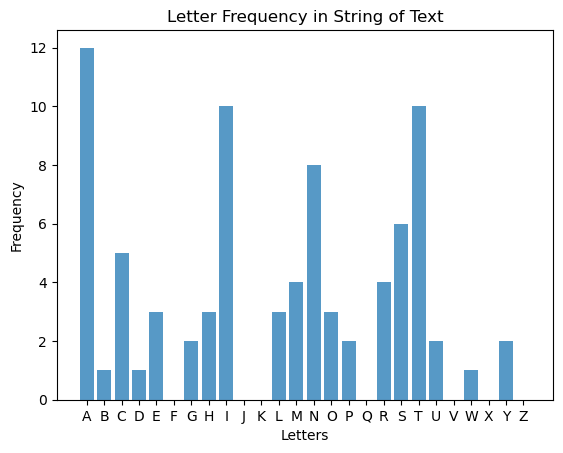

In [25]:
# Example 1:
message = """Alan Mathison Turing was a British mathematician, 
logician, cryptanalyst, and computer scientist. """

letterCounts = getLetterCounts(message)
print(letterCounts)
plotLetterCounts(letterCounts)

### Vigenère Cryptanalysis Tools

#### Kasiski Examination

Text that was encrypted using the Vigenère cipher may seem like it should be difficult to crack.  
After all, if we don't know the length of the key, then we don't know which characters were encoded using the same shift.  
However, by considering "words" of length 3 or more that appear in multiple places in the ciphertext, it is likely that they came from the same words in the plaintext and just happened to have been encoded in the same way — that is, the spacing between them coincidentally matched the length of the key. This is something we can exploit.

The `findRepeatSequencesSpacings()` function below analyzes the message text and returns all repeated sequences of length 3 to 5 characters along with how far apart they are in the message. It is quite likely that the key has a length which divides all these values.

In other words, the *key* to unlocking the key length is the **gcd**.


In [27]:
import re   # use regular expressions to do a bit of magic on line 3 and 11

NONLETTERS_PATTERN = re.compile('[^A-Z]')

def findRepeatSequencesSpacings(message):
    # Goes through the message and finds any length 3 to 5 letter sequences
    # that are repeated. Returns a dictionary with the keys of the sequence and
    # values of a list of spacings (num of letters between the repeats).

    # Use a regular expression to remove non-letters from the message:
    message = NONLETTERS_PATTERN.sub('', message.upper())

    # Compile a list of seqLen-letter sequences found in the message:
    seqSpacings = {} # Keys are sequences, values are lists of int spacings.
    for seqLen in range(3, 6):
        for seqStart in range(len(message) - seqLen):
            # Determine what the sequence is, and store it in seq:
            seq = message[seqStart:seqStart + seqLen]

            # Look for this sequence in the rest of the message:
            for i in range(seqStart + seqLen, len(message) - seqLen):
                if message[i:i + seqLen] == seq:
                    # Found a repeated sequence.
                    if seq not in seqSpacings:
                        seqSpacings[seq] = [] # Initialize a blank list.

                    # Append the spacing distance between the repeated
                    # sequence and the original sequence:
                    seqSpacings[seq].append(i - seqStart)
    return seqSpacings

If you are wondering what the line `NONLETTERS_PATTERN.sub('', message.upper())` does, it does a little bit of magic where it takes the string `message' and strips away any characters that aren't letters.  Check it out...

In [30]:
message = "here,, is a string 1234 with???  other characters.."
NONLETTERS_PATTERN.sub('', message.upper())

'HEREISASTRINGWITHOTHERCHARACTERS'

### Example

In this example we demonstrate what `findRepeatSequencesSpacings()` does. Consider the ciphertext:

    CHREEVOAHMAERATBIAXXWTNXBEEOPHBSBQMQEQERBWRVXUOAKXAOSXXWEAHB
    WGJMMQMNKGRFVGXWTRZXWIAKLXFPSKAUTEMNDCMGTSXMXBTUIADNGMGPSREL
    XNJELXVRVPRTULHDNQWTWDTYGBPHXTFALJHASVBFXNGLLCHRZBWELEKMSJIK
    NBHWRJGNMGJSGLXFEYPHAGNRBIEQJTAMRVLCRREMNDGLXRRIMGNSNRWCHRQH
    AEYEVTAQEBBIPEEWEVKAKOEWADREMXMTBHHCHRTKDNVRZCHRCLQOHPWQAIIW
    XNRMGWOIIFKEE

Let's find all repeated occurrences of strings of length 3 to 5, and report back the distance between successive occurrences of the strings. 

In [42]:
ciphertext = """CHREEVOAHMAERATBIAXXWTNXBEEOPHBSBQMQEQERBWRVXUOAKXAOSXXWEAHBWGJMMQMNKGRFVGXWTRZXWIAKLXFPSKAUTEMNDCMGTSXMXBTUIADNGMGPSRELXNJELXVRVPRTULHDNQWTWDTYGBPHXTFALJHASVBFXNGLLCHRZBWELEKMSJIKNBHWRJGNMGJSGLXFEYPHAGNRBIEQJTAMRVLCRREMNDGLXRRIMGNSNRWCHRQHAEYEVTAQEBBIPEEWEVKAKOEWADREMXMTBHHCHRTKDNVRZCHRCLQOHPWQAIIWXNRMGWOIIFKEE"""
findRepeatSequencesSpacings(ciphertext)

{'CHR': [165, 235, 275, 285, 70, 110, 120, 40, 50, 10],
 'XXW': [35],
 'XWT': [55],
 'LXF': [109],
 'EMN': [125],
 'MND': [125],
 'ELX': [5],
 'GLX': [30],
 'REM': [49],
 'EMND': [125]}

The sequence `CHR' appears frequently in the text, so it is likely it came from the same three letter sequence in plain text. The gcd of the gap sizes is $5$. Therefore, we suspect the key length is $5$.

#### Index of Coincidence

If two randomly selected characters are taken from a block of English text, what is the probability they will be the same character?  
(This probability is called the **index of coincidence**.) It turns out that the answer to this question can provide insight into the length of the key for text encrypted with the Vigenère cipher.

The probability that two randomly selected characters are the same is about 0.065 (or 6.5%). How can we use this fact?

First, let's create the incidence of coincidence function in Python.


In [43]:
# Index of Coincidence
# WARNING: requires `getLetterCount` function to be executed (defined above)

def indexOfCoincidenceSingle(message):
    """Takes as input a string, returns the index of coincidence - the probability that 
    two randomly selected characters of the string are the same"""
    letterCounts = getLetterCounts(message)
    N=len(message)
    ioc = sum([letterCounts[letter]*(letterCounts[letter]-1) for letter in letterCounts.keys()])
    return round(ioc/(N*(N-1)),4)

def indexOfCoincidence(message,m):
    """Takes as input a string, and a positive integer m. The message string is 
    split into m substrings:  by writing the message in columns of m characters 
    and taking the rows as substrings. 
    Returns the index of coincidence for the string corresponding to each row"""
    messages = ['']*m
    currentIndex = 0
    for i in range(len(message)):
        messages[i%m] += message[i]
    return list(map(indexOfCoincidenceSingle,messages))

### Example (continued)

Consider the same ciphertext as above. We loop over key lengths k from 2 through 6
and for each one check the index of coincidence for the k substrings.


In [41]:
# Example
message = '''CHREEVOAHMAERATBIAXXWTNXBEEOPHBSBQMQEQERBWRVXUOAKXAOSXXWEAHBWGJMMQMNKGRFVGXWTRZXWIAKLXFPSKAUTEMNDCMGTSXMXBTUIADNGMGPSRELXNJELXVRVPRTULHDNQWTWDTYGBPHXTFALJHASVBFXNGLLCHRZBWELEKMSJIKNBHWRJGNMGJSGLXFEYPHAGNRBIEQJTAMRVLCRREMNDGLXRRIMGNSNRWCHRQHAEYEVTAQEBBIPEEWEVKAKOEWADREMXMTBHHCHRTKDNVRZCHRCLQOHPWQAIIWXNRMGWOIIFKEE'''
for k in range(2,7):
    print('key length = {0}, index of coincidence = {1}'.format(k,indexOfCoincidence(message,k)))

key length = 2, index of coincidence = [0.0456, 0.041]
key length = 3, index of coincidence = [0.0432, 0.0497, 0.0471]
key length = 4, index of coincidence = [0.0422, 0.039, 0.0453, 0.0403]
key length = 5, index of coincidence = [0.063, 0.0681, 0.0686, 0.0608, 0.0724]
key length = 6, index of coincidence = [0.0443, 0.0437, 0.0475, 0.0415, 0.049, 0.037]


Substrings corresponding to key length $5$ have an index of coincidence that 
is in line with the english language. Therefore, we suspect the key length is 5.

Let's dive in a bit deeper and figure out what is actually going on.  
Consider the text:

>Puzzles are made of the things that the mathematician, no less than the child, plays with, and dreams and wonders about, for they are made of the things and circumstances of the world he or she lives in.

We'll convert it to lowercase and strip away everything but the letters:

>puzzlesaremadeofthethingsthatthemathematiciannolessthanthechildplayswithanddreamsandwondersaboutfortheyaremadeofthethingsandcircumstancesoftheworldheorshelivesin

If we were to select any two positions in the text, the probability that the characters at those positions are the same (*index of coincidence*) should be around 0.065.

Moreover, if we split up the string into substrings by going through the string from left to right and subsequently dropping each letter into a substring as you would deal out a deck of cards:

>substring1: p l r d t ...  
>substring2: u e e e h ...  
>substring3: z s m o e ...  
>substring4: z a a f t ...

then for each of these substrings we must also have an index of coincidence of approximately 0.065.

If we encrypt this text using the Vigenère cipher, then each substring that was encrypted using the same "shift" would also have this same index of coincidence. On the other hand, mixing together letters encrypted using different shifts would not have this same index of coincidence.

This is why in the example above we suspected the key length was 5, because the index of coincidence of each substring in that case was about 0.065.


## Exercises

In each of the following exercises assume the symbol list is:

`SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`

1. Encrypt the following message using each of the ciphers and the keys given. Use symbol list:

> EVERYONE KNOWS THAT IT IS EASY TO DO A PUZZLE IF SOMEONE HAS TOLD YOU THE ANSWER. THAT IS SIMPLY A TEST OF MEMORY. YOU CAN CLAIM TO BE A MATHEMATICIAN ONLY IF YOU CAN SOLVE PUZZLES THAT YOU HAVE NEVER STUDIED BEFORE. THAT IS A TEST OF REASONING.

(a) Shift cipher, with key $13$. <br />
(b) Affine cipher, with key $(25,2)$. <br />
(c) Vigenère Cipher, with key `WATER`. <br />

In [63]:
# put your code here
plaintext = """EVERYONE KNOWS THAT IT IS EASY TO DO A PUZZLE IF SOMEONE HAS TOLD YOU THE ANSWER. THAT IS SIMPLY A TEST OF MEMORY. YOU CAN CLAIM TO BE A MATHEMATICIAN ONLY IF YOU CAN SOLVE PUZZLES THAT YOU HAVE NEVER STUDIED BEFORE. THAT IS A TEST OF REASONING."""


2. A message was encrypted using the Shift cipher and produced the following text:

> KLGJAWK GX AESYAFSLAGF LWFV LG MHKWL LZGKW OALZGML GFW.

Determine the original message by doing a brute-force search through all the keys.

In [62]:
# put your code here
ciphertext = """KLGJAWK GX AESYAFSLAGF LWFV LG MHKWL LZGKW OALZGML GFW."""


3. A message was encrypted using the Affine cipher and produced the following text:

> AKXQ W EWJ W VKDQ WJL FQ KI CWDE VOD W LWM, BSN IQN VKDQ NO FKE WJL FQ KI CWDE VOD NFQ DQIN OV FKI ZKVQ.

Determine the original message by doing a brute-force search through all the keys.


In [61]:
# put your code here
ciphertext = """AKXQ W EWJ W VKDQ WJL FQ KI CWDE VOD W LWM, BSN IQN VKDQ NO FKE WJL FQ KI CWDE VOD NFQ DQIN OV FKI ZKVQ."""


4. A message was encrypted using the Vigen\`{e}re Cipher cipher, with a key of length $2$, and produced the following text:
> OCY ICEF YKX EESCHSCXG, VCYY PCB MYIB CGB OLKAZZOG, NWCQYJOF ICEF YKX DBCYTC.

Determine the original message by doing a brute-force search through all the keys.

In [57]:
# put your code here
ciphertext = """OCY ICEF YKX EESCHSCXG, VCYY PCB MYIB CGB OLKAZZOG, NWCQYJOF ICEF YKX DBCYTC."""

In [60]:
SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
